In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 inter_bin_distance_penalty=0.0,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=range(2,21),
                 n_init_bins_list=[5,10,15,20,30])

In [4]:
# print('#Numerical Vars =', len(var_dict['numerical_vars']))
# print('#Categorical Vars =', len(var_dict['categorical_vars']))
# print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

In [5]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.635563850402832
[4, 2, 5]
>>> Epoch = 2, Loss = 0.5209779143333435
[4, 2, 4]
>>> Epoch = 3, Loss = 0.43849000334739685
[4, 2, 4]
>>> Epoch = 4, Loss = 0.4040167033672333
[4, 2, 4]
>>> Epoch = 5, Loss = 0.3856823146343231
[4, 2, 4]
>>> Epoch = 6, Loss = 0.37877950072288513
[4, 2, 4]
>>> Epoch = 7, Loss = 0.3765089511871338
[4, 2, 4]
>>> Epoch = 8, Loss = 0.36996790766716003
[4, 2, 4]
>>> Epoch = 9, Loss = 0.3683070242404938
[4, 2, 2]
>>> Epoch = 10, Loss = 0.37234774231910706
[4, 2, 2]
>>> Epoch = 11, Loss = 0.3673361837863922
[4, 2, 2]
>>> Epoch = 12, Loss = 0.3657079339027405
[4, 2, 2]
>>> Epoch = 13, Loss = 0.36934584379196167
[4, 2, 2]
>>> Epoch = 14, Loss = 0.36474448442459106
[4, 2, 2]
>>> Epoch = 15, Loss = 0.3623058497905731
[4, 2, 2]
>>> Epoch = 16, Loss = 0.36423951387405396
[4, 2, 2]
>>> Epoch = 17, Loss = 0.3635616600513458
[4, 2, 2]
>>> Epoch = 18, Loss = 0.3606838583946228
[4, 2, 2]
>>> Epoch = 19, Loss = 0.36107680201530457
[4, 3, 2]
>>> Epoch = 20

[2, 2, 4]
>>> Epoch = 58, Loss = 0.29768088459968567
[2, 2, 4]
>>> Epoch = 59, Loss = 0.2988260090351105
[2, 2, 4]
>>> Epoch = 60, Loss = 0.29613834619522095
[2, 2, 4]
>>> Epoch = 61, Loss = 0.30034297704696655
[2, 2, 4]
>>> Epoch = 62, Loss = 0.29587915539741516
[2, 2, 4]
>>> Epoch = 63, Loss = 0.29899099469184875
[2, 2, 4]
>>> Epoch = 64, Loss = 0.2945788502693176
[2, 2, 4]
>>> Epoch = 65, Loss = 0.29810693860054016
[2, 2, 4]
>>> Epoch = 66, Loss = 0.2960796058177948
[2, 2, 4]
>>> Epoch = 67, Loss = 0.2964921295642853
[2, 2, 4]
>>> Epoch = 68, Loss = 0.29540392756462097
[2, 2, 4]
>>> Epoch = 69, Loss = 0.2981871962547302
[2, 2, 4]
>>> Epoch = 70, Loss = 0.29840341210365295
[2, 2, 4]
>>> Epoch = 71, Loss = 0.29558613896369934
[2, 2, 4]
>>> Epoch = 72, Loss = 0.2993336021900177
[3, 3, 4]
>>> Epoch = 73, Loss = 0.29909783601760864
[3, 3, 4]
>>> Epoch = 74, Loss = 0.29304012656211853
[3, 3, 4]
>>> Epoch = 75, Loss = 0.29788634181022644
[3, 3, 4]
>>> Epoch = 76, Loss = 0.2957969009876251


[19, 19, 19]
>>> Epoch = 12, Loss = 0.23071220517158508
[19, 18, 18]
>>> Epoch = 13, Loss = 0.2294967919588089
[18, 19, 18]
>>> Epoch = 14, Loss = 0.22809605300426483
[19, 19, 18]
>>> Epoch = 15, Loss = 0.2273811250925064
[19, 19, 18]
>>> Epoch = 16, Loss = 0.22866733372211456
[18, 19, 16]
>>> Epoch = 17, Loss = 0.22648851573467255
[18, 19, 18]
>>> Epoch = 18, Loss = 0.2272445410490036
[19, 18, 19]
>>> Epoch = 19, Loss = 0.22820112109184265
[19, 19, 13]
>>> Epoch = 20, Loss = 0.22628873586654663
[18, 18, 16]
>>> Epoch = 21, Loss = 0.2274974137544632
[19, 18, 18]
>>> Epoch = 22, Loss = 0.2262486070394516
[17, 18, 15]
>>> Epoch = 23, Loss = 0.22432997822761536
[18, 17, 15]
>>> Epoch = 24, Loss = 0.2254403531551361
[19, 17, 19]
>>> Epoch = 25, Loss = 0.22338537871837616
[16, 17, 19]
>>> Epoch = 26, Loss = 0.22469013929367065
[14, 17, 20]
>>> Epoch = 27, Loss = 0.22487026453018188
[14, 17, 13]
>>> Epoch = 28, Loss = 0.22346115112304688
[14, 16, 13]
>>> Epoch = 29, Loss = 0.2246981263160705

[3, 2, 5]
>>> Epoch = 64, Loss = 0.17434415221214294
[3, 2, 5]
>>> Epoch = 65, Loss = 0.17432618141174316
[3, 2, 4]
>>> Epoch = 66, Loss = 0.17538778483867645
[3, 2, 3]
>>> Epoch = 67, Loss = 0.17405860126018524
[4, 2, 3]
>>> Epoch = 68, Loss = 0.1742512434720993
[4, 2, 3]
>>> Epoch = 69, Loss = 0.17421287298202515
[4, 2, 3]
>>> Epoch = 70, Loss = 0.1733710616827011
[4, 5, 3]
>>> Epoch = 71, Loss = 0.1727907508611679
[4, 5, 3]
>>> Epoch = 72, Loss = 0.17300815880298615
[4, 5, 3]
>>> Epoch = 73, Loss = 0.17451265454292297
[4, 5, 3]
>>> Epoch = 74, Loss = 0.17290429770946503
[4, 5, 4]
>>> Epoch = 75, Loss = 0.1744951754808426
[4, 5, 4]
>>> Epoch = 76, Loss = 0.17450664937496185
[4, 5, 3]
>>> Epoch = 77, Loss = 0.17469461262226105
[4, 5, 3]
>>> Epoch = 78, Loss = 0.1737639456987381
[4, 5, 3]
>>> Epoch = 79, Loss = 0.17356730997562408
[4, 5, 3]
>>> Epoch = 80, Loss = 0.17405541241168976
[4, 5, 4]
>>> Epoch = 81, Loss = 0.1736990064382553
[4, 5, 3]
>>> Epoch = 82, Loss = 0.17282268404960632

In [6]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 34, NMI = 0.0019
agglomerative, #Cols = 34, NMI = 0.0115


In [7]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 34, NMI = 0.0005
agglomerative, #Cols = 34, NMI = 0.2184


In [8]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 37, #NMI = 0.0001
#Bins = 3, #Cols = 40, #NMI = 0.0294
#Bins = 4, #Cols = 43, #NMI = 0.0148
#Bins = 5, #Cols = 46, #NMI = 0.0148
#Bins = 6, #Cols = 49, #NMI = 0.0148
#Bins = 7, #Cols = 52, #NMI = 0.0148
#Bins = 8, #Cols = 55, #NMI = 0.0148
#Bins = 9, #Cols = 58, #NMI = 0.0148
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 11, #Cols = 64, #NMI = 0.0148
#Bins = 12, #Cols = 67, #NMI = 0.0148
#Bins = 13, #Cols = 70, #NMI = 0.0148
#Bins = 14, #Cols = 73, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
#Bins = 16, #Cols = 79, #NMI = 0.0148
#Bins = 17, #Cols = 82, #NMI = 0.0148
#Bins = 18, #Cols = 85, #NMI = 0.0148
#Bins = 19, #Cols = 88, #NMI = 0.0148
#Bins = 20, #Cols = 91, #NMI = 0.0148
agglomerative
#Bins = 2, #Cols = 37, #NMI = 0.1536
#Bins = 3, #Cols = 40, #NMI = 0.2487
#Bins = 4, #Cols = 43, #NMI = 0.2852
#Bins = 5, #Cols = 46, #NMI = 0.2536
#Bins = 6, #Cols = 49, #NMI = 0.3148
#Bins = 7, #Cols = 52, #NMI = 0.2608
#Bins = 8, #Cols = 55, #NMI = 0.3268
#Bins 

In [9]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 37, #NMI = 0.0013
#Bins = 3, #Cols = 40, #NMI = 0.0985
#Bins = 4, #Cols = 43, #NMI = 0.0148
#Bins = 5, #Cols = 46, #NMI = 0.0148
#Bins = 6, #Cols = 49, #NMI = 0.0148
#Bins = 7, #Cols = 52, #NMI = 0.0148
#Bins = 8, #Cols = 55, #NMI = 0.0148
#Bins = 9, #Cols = 58, #NMI = 0.0148
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 11, #Cols = 64, #NMI = 0.0148
#Bins = 12, #Cols = 67, #NMI = 0.0148
#Bins = 13, #Cols = 70, #NMI = 0.0148
#Bins = 14, #Cols = 73, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
#Bins = 16, #Cols = 79, #NMI = 0.0148
#Bins = 17, #Cols = 82, #NMI = 0.0148
#Bins = 18, #Cols = 85, #NMI = 0.0148
#Bins = 19, #Cols = 88, #NMI = 0.0148
#Bins = 20, #Cols = 91, #NMI = 0.0148
agglomerative
#Bins = 2, #Cols = 37, #NMI = 0.0160
#Bins = 3, #Cols = 40, #NMI = 0.3295
#Bins = 4, #Cols = 43, #NMI = 0.2200
#Bins = 5, #Cols = 46, #NMI = 0.2863
#Bins = 6, #Cols = 49, #NMI = 0.3066
#Bins = 7, #Cols = 52, #NMI = 0.3362
#Bins = 8, #Cols = 55, #NMI = 0.2664
#Bins 

In [10]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 5, #Cols = 38, NMI = 0.0109
#Init Bins = 10, #Cols = 41, NMI = 0.1193
#Init Bins = 15, #Cols = 44, NMI = 0.0330
#Init Bins = 20, #Cols = 42, NMI = 0.1646
#Init Bins = 30, #Cols = 44, NMI = 0.1761
agglomerative
#Init Bins = 5, #Cols = 38, NMI = 0.0340
#Init Bins = 10, #Cols = 41, NMI = 0.3468
#Init Bins = 15, #Cols = 44, NMI = 0.3478
#Init Bins = 20, #Cols = 42, NMI = 0.3446
#Init Bins = 30, #Cols = 44, NMI = 0.3484


In [11]:
exp.semantic_binning.bins_by_var

{'average_montly_hours': {'bins': ['(95.999, 126.0]',
   '(126.0, 162.0]',
   '(162.0, 272.0]',
   '(272.0, 310.0]'],
  'split_point': [95.999, 126.0, 162.0, 272.0, 310.0]},
 'last_evaluation': {'bins': ['(0.359, 0.57]',
   '(0.57, 0.76]',
   '(0.76, 0.97]',
   '(0.97, 0.99]',
   '(0.99, 1.0]'],
  'split_point': [0.359, 0.57, 0.76, 0.97, 0.99, 1.0]},
 'satisfaction_level': {'bins': ['(0.089, 0.14]',
   '(0.14, 0.317]',
   '(0.317, 0.45]',
   '(0.45, 1.0]'],
  'split_point': [0.089, 0.14, 0.317, 0.45, 1.0]}}

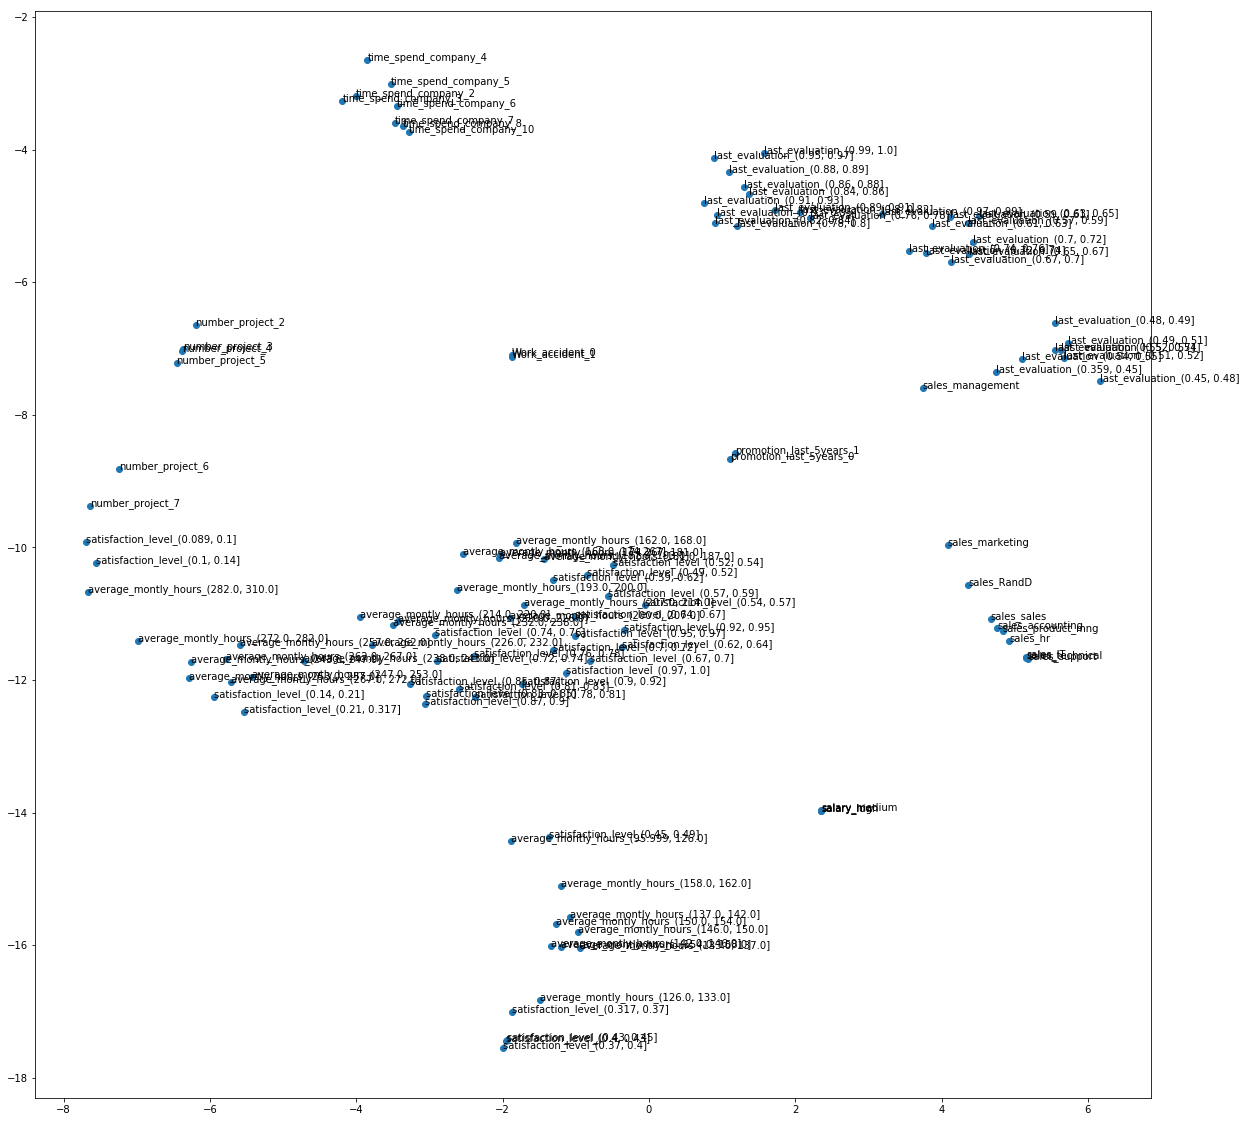

In [12]:
exp.semantic_binning.visualize_bin_embeddings()

### (1) 다른 데이터셋?

### (3) 정성 평가?

### (2) 수렴하면 중도에 멈추도록 하고 싶은데, 체크할 방법?